# Aula 14

- to_datetime()
- groupby()
- merge()

https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020


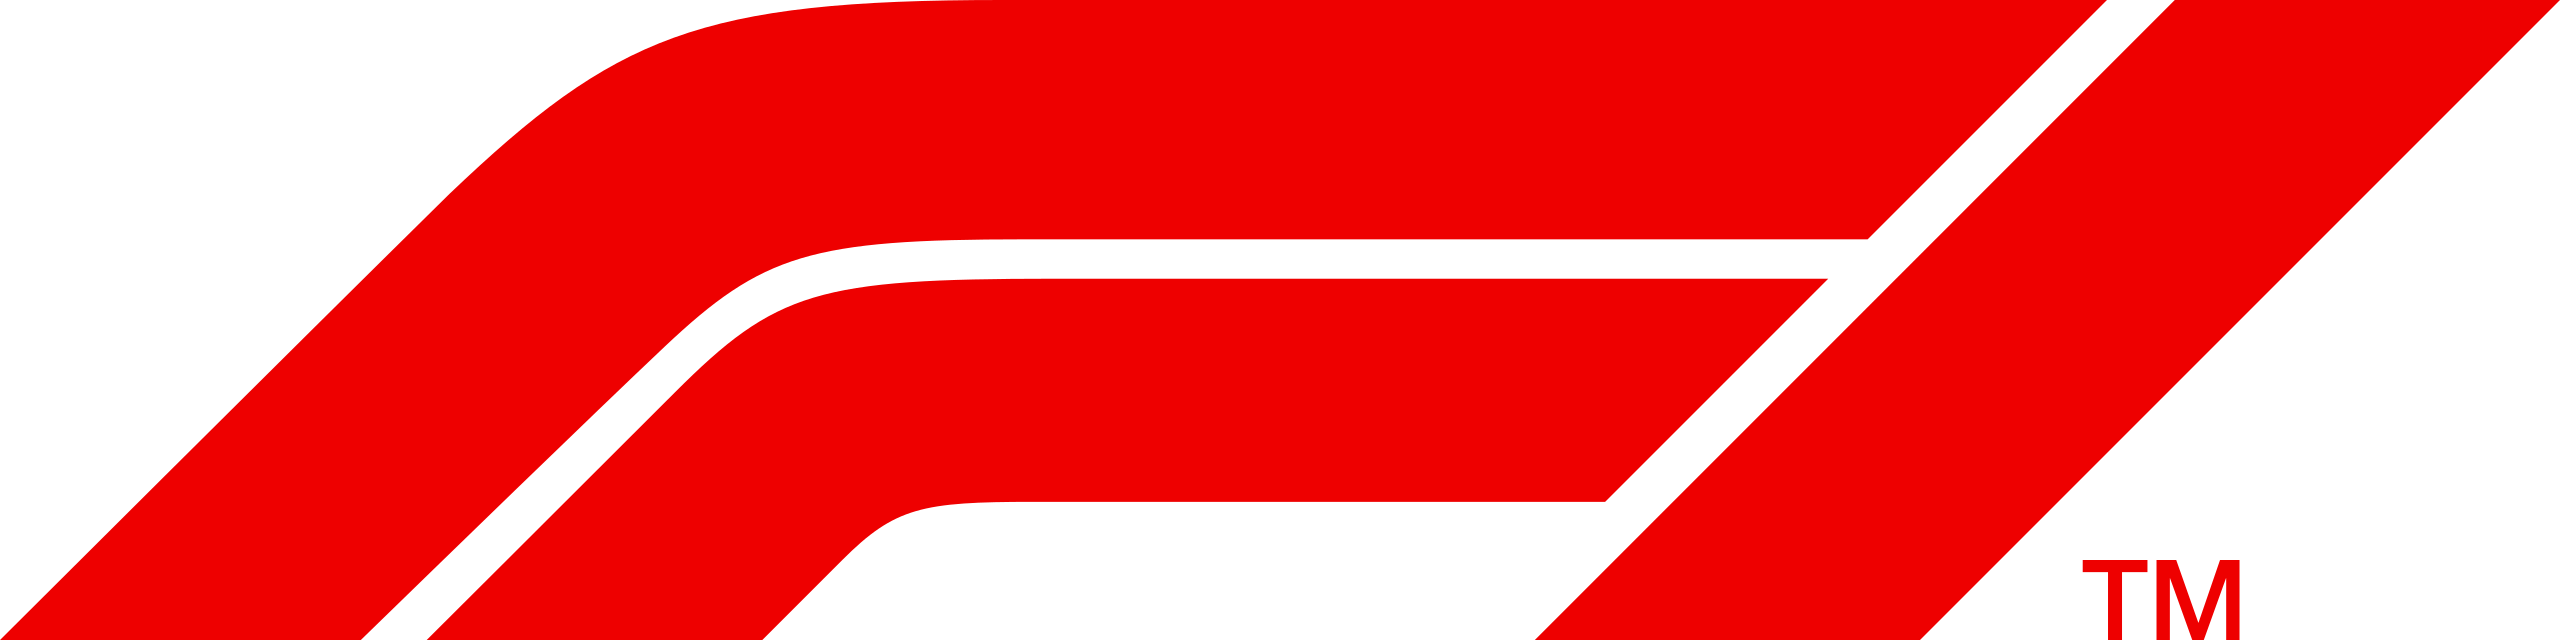



## Exemplo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

circuitos = '/content/drive/MyDrive/Programação em Python para Data Science/f1/circuits.csv'
lap = '/content/drive/MyDrive/Programação em Python para Data Science/f1/lap_times.csv'
race = '/content/drive/MyDrive/Programação em Python para Data Science/f1/races.csv'
drivers = '/content/drive/MyDrive/Programação em Python para Data Science/f1/drivers.csv'

df_circuitos = pd.read_csv(circuitos)
df_lap = pd.read_csv(lap)
df_race = pd.read_csv(race)
df_drivers = pd.read_csv(drivers)

###Localizando o circuito de Interlagos

In [13]:
df_circuitos.head(10)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.52280,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.16361,228,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.56583,103,http://en.wikipedia.org/wiki/Hockenheimring


In [14]:
df_circuitos[df_circuitos.location == 'Monte-Carlo']

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco


### Transformar os dados de uma coluna para o padão de data.

In [21]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   raceId       1125 non-null   int64         
 1   year         1125 non-null   int64         
 2   round        1125 non-null   int64         
 3   circuitId    1125 non-null   int64         
 4   name         1125 non-null   object        
 5   date         1125 non-null   datetime64[ns]
 6   time         1125 non-null   object        
 7   url          1125 non-null   object        
 8   fp1_date     1125 non-null   object        
 9   fp1_time     1125 non-null   object        
 10  fp2_date     1125 non-null   object        
 11  fp2_time     1125 non-null   object        
 12  fp3_date     1125 non-null   object        
 13  fp3_time     1125 non-null   object        
 14  quali_date   1125 non-null   object        
 15  quali_time   1125 non-null   object        
 16  sprint

In [19]:
# Transforma a coluna DATA que está como objeto (String) para data
df_race.date = pd.to_datetime(df_race.date)

### Filtrar dados de interlagos

In [20]:
df_race_interlagos = df_race[df_race.circuitId == 6]
df_race_interlagos.head(3)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
22,23,2008,6,6,Monaco Grand Prix,2008-05-25,12:00:00,http://en.wikipedia.org/wiki/2008_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
39,40,2007,5,6,Monaco Grand Prix,2007-05-27,12:00:00,http://en.wikipedia.org/wiki/2007_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


### Filtrar dados após 2022

In [19]:
interlagos_maior_2022 = df_race_interlagos[df_race_interlagos.date > '2022-01-01']
interlagos_maior_2022

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1077,1095,2022,21,18,São Paulo Grand Prix,2022-11-13,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,2022-11-11,15:30:00,2022-11-12,15:30:00,\N,\N,2022-11-11,19:00:00,2022-11-12,19:30:00
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00


### Criando um df com o tempo de volta de todos os pilotos entre 2022 e 2024

In [20]:
tempo_interlagos = df_lap[df_lap.raceId.isin([1095, 1118, 1141])]
tempo_interlagos.head()

,raceId,driverId,lap,position,time,milliseconds
535748,1095,847,1,1,1:28.575,88575
535749,1095,847,2,1,1:56.346,116346
535750,1095,847,3,1,1:59.966,119966
535751,1095,847,4,1,1:59.234,119234
535752,1095,847,5,1,1:54.429,114429


### Agrupando os dados por piloto selecionado o menor tempo

In [21]:
tempo_interlagos[['driverId',
                  'time']].groupby(
                      'driverId',
                      as_index=False)['time'].min().sort_values(by='driverId')


,driverId,time
0,1,1:13.942
1,4,1:14.164
2,20,1:15.549
3,807,1:15.036
4,815,1:14.124
5,817,1:13.866
6,822,1:15.511
7,830,1:13.422
8,832,1:13.953
9,839,1:14.206


In [22]:
tempo_por_piloto = tempo_interlagos.groupby('driverId',
                                            as_index=False).agg(tempo_minimo=('time', 'min'),
                                                                tempo_maximo=('time', 'max')).sort_values(by='driverId')

tempo_por_piloto

,driverId,tempo_minimo,tempo_maximo
0,1,1:13.942,2:40.982
1,4,1:14.164,2:41.090
2,20,1:15.549,2:01.932
3,807,1:15.036,3:50.215
4,815,1:14.124,2:36.778
5,817,1:13.866,2:29.416
6,822,1:15.511,2:31.847
7,830,1:13.422,2:38.629
8,832,1:13.953,2:34.208
9,839,1:14.206,2:38.230


### Trazendo as informações dos pilotos

In [23]:
df_drivers.head(3)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg


In [24]:
tempo_por_piloto = pd.merge(tempo_por_piloto, df_drivers[['driverId', 'surname']], on='driverId')

In [27]:
tempo_por_piloto

,driverId,tempo_minimo,tempo_maximo,surname
0,1,0 days 00:01:13.942000,0 days 00:02:40.982000,Hamilton
1,4,0 days 00:01:14.164000,0 days 00:02:41.090000,Alonso
2,20,0 days 00:01:15.549000,0 days 00:02:01.932000,Vettel
3,807,0 days 00:01:15.036000,0 days 00:03:50.215000,Hülkenberg
4,815,0 days 00:01:14.124000,0 days 00:02:36.778000,Pérez
5,817,0 days 00:01:13.866000,0 days 00:02:29.416000,Ricciardo
6,822,0 days 00:01:15.511000,0 days 00:02:31.847000,Bottas
7,830,0 days 00:01:13.422000,0 days 00:02:38.629000,Verstappen
8,832,0 days 00:01:13.953000,0 days 00:02:34.208000,Sainz
9,839,0 days 00:01:14.206000,0 days 00:02:38.230000,Ocon


In [28]:
tempo_por_piloto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   driverId      25 non-null     int64          
 1   tempo_minimo  25 non-null     timedelta64[ns]
 2   tempo_maximo  25 non-null     timedelta64[ns]
 3   surname       25 non-null     object         
dtypes: int64(1), object(1), timedelta64[ns](2)
memory usage: 932.0+ bytes


In [29]:
tempo_por_piloto['tempo_minimo'] = pd.to_timedelta('00:' + tempo_por_piloto['tempo_minimo'])
tempo_por_piloto['tempo_maximo'] = pd.to_timedelta('00:' + tempo_por_piloto['tempo_maximo'])

TypeError: can only concatenate str (not "TimedeltaArray") to str

## Biblioteca Numpy

### Exemplo

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados = {
    "Temperatura (°C)": [22, 25, 20, 18, 24, 27, 23],
    "Umidade (%)": [60, 55, 65, 70, 58, 52, 63],
    "Velocidade do Vento (km/h)": [12, 10, 8, 15, 14, 9, 11]
}
df = pd.DataFrame(dados)

df


,Temperatura (°C),Umidade (%),Velocidade do Vento (km/h)
0,22,60,12
1,25,55,10
2,20,65,8
3,18,70,15
4,24,58,14
5,27,52,9
6,23,63,11


In [11]:
media_temp = np.mean(df["Temperatura (°C)"])
float(media_temp)

22.714285714285715

In [30]:
mediana_temp = np.median(df["Temperatura (°C)"])
float(mediana_temp)

23.0

In [12]:
amp_temp = np.max(df["Temperatura (°C)"]) - np.min(df["Temperatura (°C)"])
amp_temp

9

In [13]:
var_temp = np.var(df["Temperatura (°C)"])
var_temp

7.918367346938777

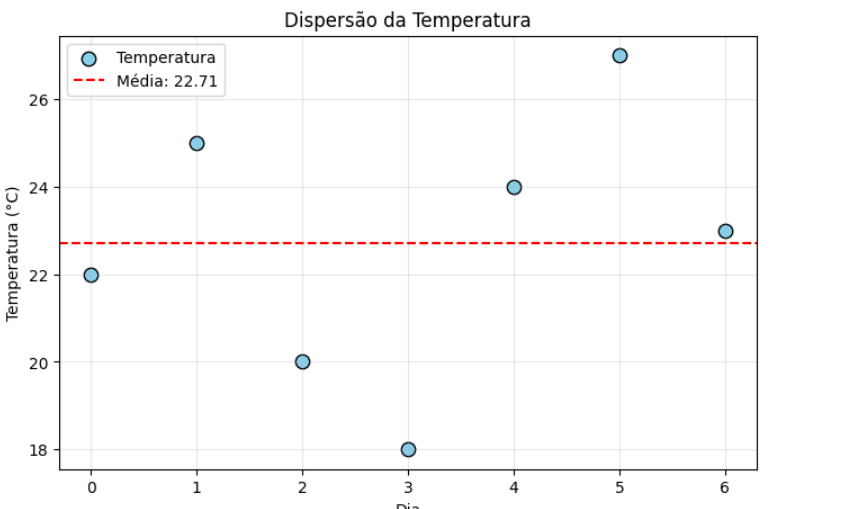

In [14]:
std_temp = np.std(df["Temperatura (°C)"])
std_temp

2.8139593719417446

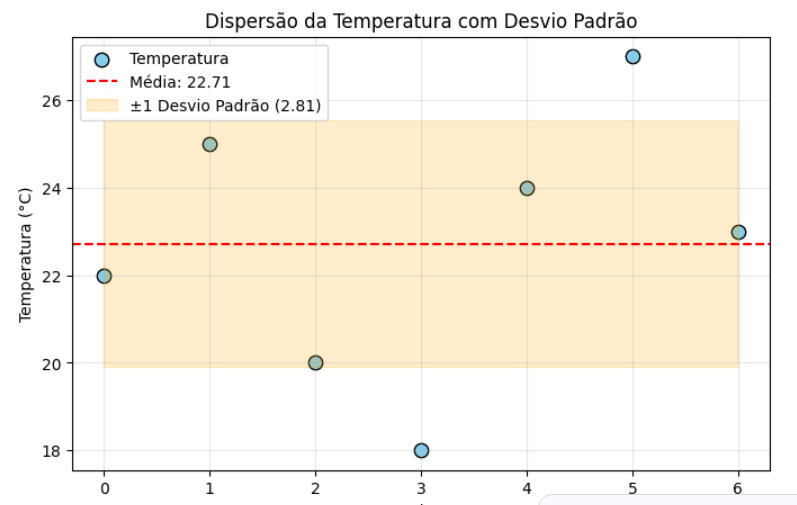

### Aplicação no df f1

In [31]:
media = np.mean(tempo_por_piloto['tempo_minimo'])
media


Timedelta('0 days 00:01:15.520400')

In [32]:
tempo_sec = tempo_por_piloto['tempo_minimo'].dt.total_seconds()
tempo_sec

,tempo_minimo
0,73.942
1,74.164
2,75.549
3,75.036
4,74.124
5,73.866
6,75.511
7,73.422
8,73.953
9,74.206


In [33]:
media = np.mean(tempo_sec)
media

np.float64(75.5204)

In [34]:
mediana = np.median(tempo_sec)
mediana


np.float64(74.31)

In [35]:
amplitude = np.max(tempo_sec) - np.min(tempo_sec)
amplitude


11.810000000000002

In [36]:
variancia = np.var(tempo_sec)
variancia


8.302617760000008

In [37]:
desvio_padrao = np.std(tempo_sec)
desvio_padrao


2.881426341241436

# Exercícios

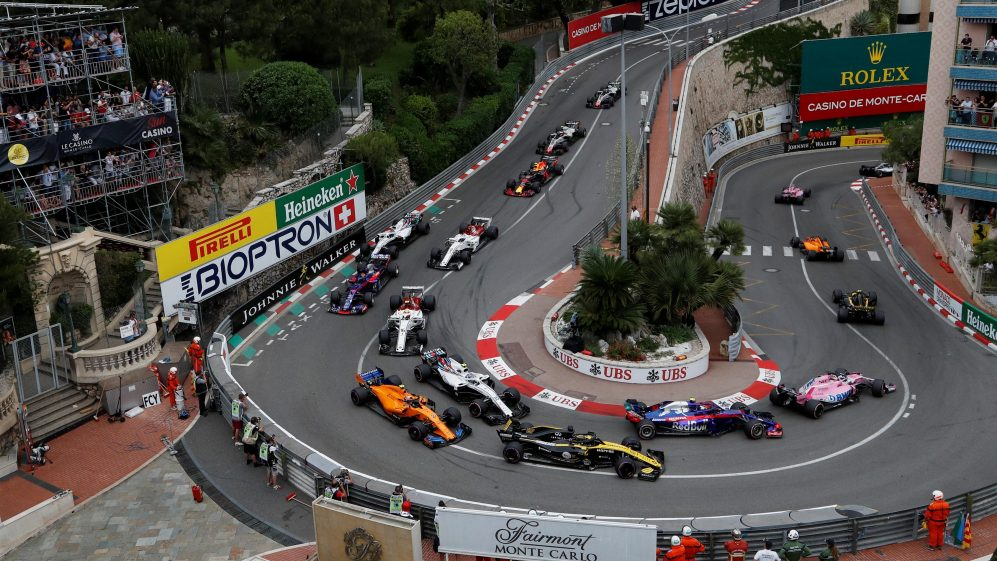

#1 - Faça um ranking dos 10 tempos de volta mais rapidas durante a corrida e seus respectivos pilotos.

In [4]:
# Encontrar o código do circuito de monaco
# df_circuitos


df_circuitos[df_circuitos.country == 'Monaco']


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco


In [5]:
# Encontrar as corridas disputadas no circuito de Monaco

corridas_monaco = df_race[df_race.circuitId == 6]
corridas_monaco

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
22,23,2008,6,6,Monaco Grand Prix,2008-05-25,12:00:00,http://en.wikipedia.org/wiki/2008_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
39,40,2007,5,6,Monaco Grand Prix,2007-05-27,12:00:00,http://en.wikipedia.org/wiki/2007_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
58,59,2006,7,6,Monaco Grand Prix,2006-05-28,14:00:00,http://en.wikipedia.org/wiki/2006_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
75,76,2005,6,6,Monaco Grand Prix,2005-05-22,14:00:00,http://en.wikipedia.org/wiki/2005_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1015,2019,6,6,Monaco Grand Prix,2019-05-26,13:10:00,http://en.wikipedia.org/wiki/2019_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1041,1056,2021,5,6,Monaco Grand Prix,2021-05-23,13:00:00,http://en.wikipedia.org/wiki/2021_Monaco_Grand...,2021-05-21,\N,2021-05-21,\N,2021-05-22,\N,2021-05-22,\N,\N,\N
1063,1080,2022,7,6,Monaco Grand Prix,2022-05-29,13:00:00,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,2022-05-27,12:00:00,2022-05-27,15:00:00,2022-05-28,11:00:00,2022-05-28,14:00:00,\N,\N
1084,1104,2023,6,6,Monaco Grand Prix,2023-05-28,13:00:00,https://en.wikipedia.org/wiki/2023_Monaco_Gran...,2023-05-26,11:30:00,2023-05-26,15:00:00,2023-05-27,10:30:00,2023-05-27,14:00:00,\N,\N


In [6]:
# Voltas do Circuito de Monaco
votlas_monaco = df_lap[df_lap.raceId.isin(corridas_monaco.raceId)]
votlas_monaco.head()

,raceId,driverId,lap,position,time,milliseconds
6288,846,20,1,1,1:24.839,84839
6289,846,20,2,1,1:20.269,80269
6290,846,20,3,1,1:19.811,79811
6291,846,20,4,1,1:19.485,79485
6292,846,20,5,1,1:19.537,79537


In [7]:
# Encontar os 10 melhores tempos
dez_voltas_rapidas = votlas_monaco.sort_values(by='milliseconds').head(10)
dez_voltas_rapidas

,raceId,driverId,lap,position,time,milliseconds
495953,1056,1,69,7,1:12.909,72909
495954,1056,1,70,7,1:13.382,73382
496800,1056,852,66,16,1:14.037,74037
496801,1056,852,67,16,1:14.077,74077
570344,1128,1,63,7,1:14.165,74165
570340,1128,1,59,7,1:14.204,74204
432878,994,830,60,9,1:14.260,74260
454803,1015,842,72,5,1:14.279,74279
454805,1015,842,74,5,1:14.301,74301
454804,1015,842,73,5,1:14.371,74371


In [8]:
# Encontrar o nome dos pilotos

dez_voltas_rapidas = pd.merge(dez_voltas_rapidas, df_drivers[['driverId', 'surname']], on = 'driverId')
dez_voltas_rapidas

,raceId,driverId,lap,position,time,milliseconds,surname
0,1056,1,69,7,1:12.909,72909,Hamilton
1,1056,1,70,7,1:13.382,73382,Hamilton
2,1056,852,66,16,1:14.037,74037,Tsunoda
3,1056,852,67,16,1:14.077,74077,Tsunoda
4,1128,1,63,7,1:14.165,74165,Hamilton
5,1128,1,59,7,1:14.204,74204,Hamilton
6,994,830,60,9,1:14.260,74260,Verstappen
7,1015,842,72,5,1:14.279,74279,Gasly
8,1015,842,74,5,1:14.301,74301,Gasly
9,1015,842,73,5,1:14.371,74371,Gasly


In [22]:
# Encontrar o ano
dez_voltas_rapidas = pd.merge(dez_voltas_rapidas, df_race[['raceId', 'year']], on='raceId')
dez_voltas_rapidas[['surname', 'year', 'lap', 'time', 'milliseconds']]

,surname,year,lap,time,milliseconds
0,Hamilton,2021,69,1:12.909,72909
1,Hamilton,2021,70,1:13.382,73382
2,Tsunoda,2021,66,1:14.037,74037
3,Tsunoda,2021,67,1:14.077,74077
4,Hamilton,2024,63,1:14.165,74165
5,Hamilton,2024,59,1:14.204,74204
6,Verstappen,2018,60,1:14.260,74260
7,Gasly,2019,72,1:14.279,74279
8,Gasly,2019,74,1:14.301,74301
9,Gasly,2019,73,1:14.371,74371


2 - Descubra quem foi o maior vencedor do circuito e em quais anos ele foi campeão.

In [30]:
# Importar a tabela de resultados

results = '/content/drive/MyDrive/Programação em Python para Data Science/f1/results.csv'

df_results = pd.read_csv(results)

df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [33]:
# Filtrar os resultados do circuito de monaco

resultados_monaco = df_results[df_results.raceId.isin(corridas_monaco.raceId)]
resultados_monaco.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
108,109,23,1,1,22,3,1,1,1,10.0,76,2:00:42.742,7242742,71,6,1:18.510,153.152,1
109,110,23,9,2,4,5,2,2,2,8.0,76,+3.064,7245806,75,5,1:17.933,154.286,1
110,111,23,13,6,2,1,3,3,3,6.0,76,+4.811,7247553,76,4,1:17.886,154.379,1
111,112,23,17,9,10,9,4,4,4,5.0,76,+19.295,7262037,74,8,1:19.036,152.133,1
112,113,23,20,5,15,19,5,5,5,4.0,76,+24.657,7267399,74,7,1:18.787,152.614,1


In [36]:
# Filtrando o vencedor das corridas de monaco

vencedores_monaco = resultados_monaco[resultados_monaco.positionOrder == 1]
vencedores_monaco.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
108,109,23,1,1,22,3,1,1,1,10.0,76,2:00:42.742,7242742,71,6,1:18.510,153.152,1
456,457,40,4,1,1,1,1,1,1,10.0,78,1:40:29.329,6029329,44,1,1:15.284,159.715,1
874,875,59,4,4,1,1,1,1,1,10.0,78,1:43:43.116,6223116,11,3,1:15.671,158.898,1
1236,1237,76,8,1,9,1,1,1,1,10.0,78,1:45:15.556,6315556,41,2,1:15.921,158.375,1
1614,1615,95,15,4,7,1,1,1,1,10.0,77,1:45:46.601,6346601,22,2,1:14.870,160.598,1


In [40]:
vencedores_monaco.driverId.value_counts().head(3)

,count
driverId,
102,6
30,5
289,5


In [45]:
# Descobrir o piloto que mais venceu

df_drivers[df_drivers.driverId == 102]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
101,102,senna,\N,\N,Ayrton,Senna,1960-03-21,Brazilian,http://en.wikipedia.org/wiki/Ayrton_Senna


In [53]:
lista_vitorias_senna = vencedores_monaco[vencedores_monaco.driverId == 102].raceId.tolist()
lista_vitorias_senna

[278, 294, 308, 324, 358, 391]

In [55]:
df_race[df_race.raceId.isin(lista_vitorias_senna)]

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
277,278,1993,6,6,Monaco Grand Prix,1993-05-23,\N,http://en.wikipedia.org/wiki/1993_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
293,294,1992,6,6,Monaco Grand Prix,1992-05-31,\N,http://en.wikipedia.org/wiki/1992_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
307,308,1991,4,6,Monaco Grand Prix,1991-05-12,\N,http://en.wikipedia.org/wiki/1991_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
323,324,1990,4,6,Monaco Grand Prix,1990-05-27,\N,http://en.wikipedia.org/wiki/1990_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
357,358,1989,3,6,Monaco Grand Prix,1989-05-07,\N,http://en.wikipedia.org/wiki/1989_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
390,391,1987,4,6,Monaco Grand Prix,1987-05-31,\N,http://en.wikipedia.org/wiki/1987_Monaco_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
